### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado? -> la segunda red ha dado mejor resultado

Para compilar el modelo, usa:

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
from tensorflow.keras import datasets, layers, models

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray

# se carga el conjunto de datos para su análisis
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

In [2]:
train_images.shape

(50000, 32, 32)

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)
(10000, 32, 32, 3)


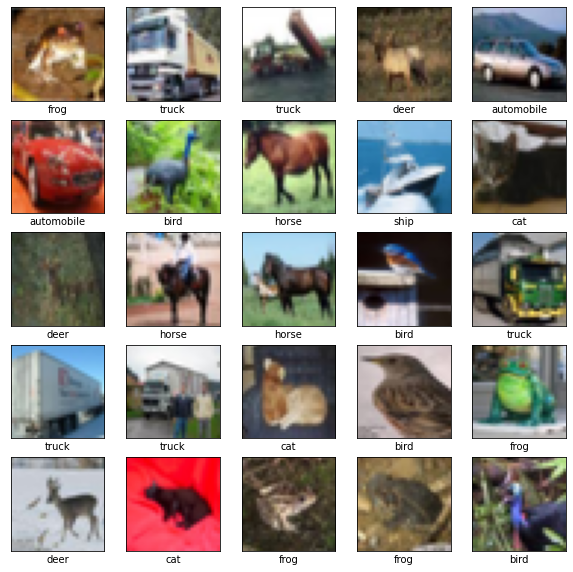

start image 0
start image 1
start image 2
start image 3
start image 4
start image 5
start image 6
start image 7
start image 8
start image 9
start image 10
start image 11
start image 12
start image 13
start image 14
start image 15
start image 16
start image 17
start image 18
start image 19
ipykernel_launcher:19: RuntimeWarning: overflow encountered in ubyte_scalars
start image 20
start image 21
start image 22
start image 23
start image 24
(50000, 32, 32, 3)
(10000, 32, 32)


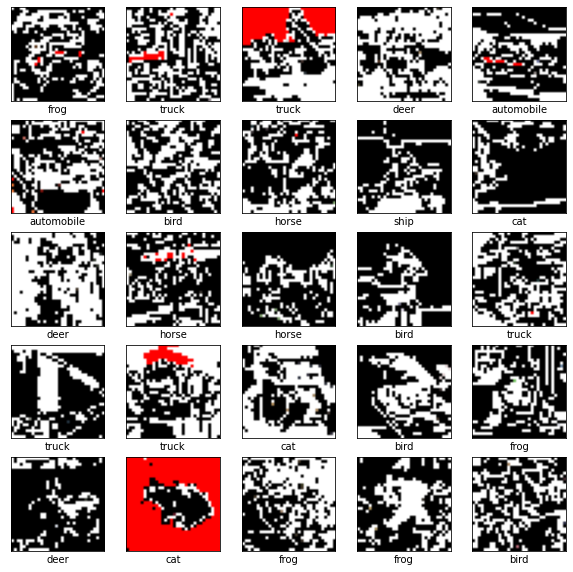

In [10]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)
print(test_images.shape)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

for i in range(25):
    print ('start image', i)
    for j in range(32):
        for k in range(32):
            acum = train_images[i][j][k][0] + train_images[i][j][k][1] + train_images[i][j][k][2]
            acum_color = acum/3
            if train_images[i][j][k][0] > 245:
                train_images[i][j][k][0] = 255
                train_images[i][j][k][1] = 0
                train_images[i][j][k][2] = 0
            elif acum_color < 50:
                train_images[i][j][k][0] = 0
                train_images[i][j][k][1] = 0
                train_images[i][j][k][2] = 0
            elif acum_color > 50:
                train_images[i][j][k][0] = 255
                train_images[i][j][k][1] = 255
                train_images[i][j][k][2] = 255
#train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

print(train_images.shape)
print(test_images.shape)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [17]:
train_images.shape

(50000, 32, 32)

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)
print(test_images.shape)

train_images[0]

(50000, 32, 32, 3)
(10000, 32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]